<a href="https://colab.research.google.com/github/Sachin961120/LSTM/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Univariate Time Series

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
ls

sample_data/


In [3]:
cd/gdrive

/gdrive


In [4]:
ls

MyDrive/


In [5]:
cd MyDrive/DL/Download Data/

/gdrive/MyDrive/DL/Download Data


In [6]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Activation, Embedding, Dropout
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error

In [7]:
data=pd.read_csv('international-airline-passengers.csv')

In [8]:
data.head()

,Month,passengers_in_100_thousands
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [9]:
data.tail()

,Month,passengers_in_100_thousands
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [10]:
ts_data=data.iloc[:,1]
ts_data.head()

0    112
1    118
2    132
3    129
4    121
Name: passengers_in_100_thousands, dtype: int64

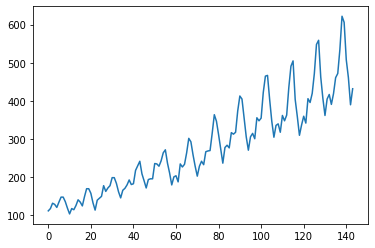

In [11]:
plt.plot(ts_data)

In [12]:
scaler= MinMaxScaler(feature_range=(0,1))
dataset= scaler.fit_transform(pd.DataFrame(ts_data)) 

In [13]:
train_fraction=0.70
train_size= int(len(dataset) * train_fraction)
test_size= len(dataset) - train_size
train, test= dataset[0:train_size,:], dataset[train_size:,:]

In [14]:
train.shape , test.shape, dataset.shape

((100, 1), (44, 1), (144, 1))

In [15]:
def create_dataset(dataset, window_size=1):
  data_X, data_Y=[], []
  for i in range (len(dataset) - window_size):
    a=dataset[i:(i + window_size), 0]
    data_X.append(a)
    data_Y.append(dataset[i + window_size, 0])
  return(np.array(data_X), np.array(data_Y))

In [16]:
window_size=10
train_X, train_Y= create_dataset(train, window_size)
test_X, test_Y= create_dataset(test, window_size)

In [17]:
train_X.shape

(90, 10)

In [18]:
train_X= np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X=  np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

In [19]:
train_X[0]

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753]])

In [20]:
model= Sequential()

model.add(LSTM(4, input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer= 'adam')
model.fit(train_X, train_Y,
          epochs=100, batch_size=1, verbose=2, shuffle= False)

Epoch 1/100
90/90 - 2s - loss: 0.0054
Epoch 2/100
90/90 - 0s - loss: 0.0148
Epoch 3/100
90/90 - 0s - loss: 0.0095
Epoch 4/100
90/90 - 0s - loss: 0.0069
Epoch 5/100
90/90 - 0s - loss: 0.0056
Epoch 6/100
90/90 - 0s - loss: 0.0050
Epoch 7/100
90/90 - 0s - loss: 0.0047
Epoch 8/100
90/90 - 0s - loss: 0.0045
Epoch 9/100
90/90 - 0s - loss: 0.0044
Epoch 10/100
90/90 - 0s - loss: 0.0044
Epoch 11/100
90/90 - 0s - loss: 0.0043
Epoch 12/100
90/90 - 0s - loss: 0.0043
Epoch 13/100
90/90 - 0s - loss: 0.0043
Epoch 14/100
90/90 - 0s - loss: 0.0042
Epoch 15/100
90/90 - 0s - loss: 0.0042
Epoch 16/100
90/90 - 0s - loss: 0.0042
Epoch 17/100
90/90 - 0s - loss: 0.0041
Epoch 18/100
90/90 - 0s - loss: 0.0041
Epoch 19/100
90/90 - 0s - loss: 0.0041
Epoch 20/100
90/90 - 0s - loss: 0.0040
Epoch 21/100
90/90 - 0s - loss: 0.0040
Epoch 22/100
90/90 - 0s - loss: 0.0040
Epoch 23/100
90/90 - 0s - loss: 0.0040
Epoch 24/100
90/90 - 0s - loss: 0.0039
Epoch 25/100
90/90 - 0s - loss: 0.0039
Epoch 26/100
90/90 - 0s - loss: 0.

In [21]:
#make predictions on the original scale of the data
pred=scaler.inverse_transform(model.predict(train_X))
#prepare Y DATA to also be on th original scale  for interpretability
orig_data= scaler.inverse_transform([train_Y])
# calculate RMSE
score_train= mean_absolute_error(orig_data[0], pred[:, 0])

In [22]:
score_train

20.081812625461154

In [23]:
#make predictions on the original scale of the data
pred=scaler.inverse_transform(model.predict(test_X))
#prepare Y DATA to also be on th original scale  for interpretability
orig_data= scaler.inverse_transform([test_Y])
# calculate RMSE
score_test= mean_absolute_error(orig_data[0], pred[:, 0])

In [24]:
score_test

44.28515535242417

In [25]:
original_data= np.concatenate([scaler.inverse_transform([train_Y])[0], scaler.inverse_transform([test_Y])[0]])
fitted=  np.concatenate([scaler.inverse_transform(model.predict(train_X))[:, 0], scaler.inverse_transform(model.predict(test_X))[:, 0]])

In [26]:
d= pd.DataFrame({'Original': original_data, 'fitted': fitted, 'index': range(len(original_data))})

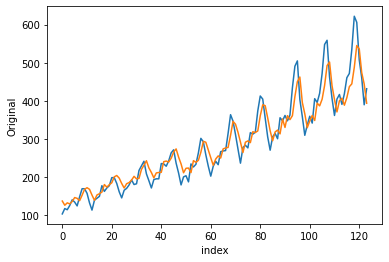

In [27]:
sns.lineplot(data=d, x='index', y='Original')
sns.lineplot(data=d, x='index', y='fitted')

## **Multiple Time Series**

In [28]:
ls

 Action_codes.csv                          fashion_mnist.zip
 action_log.csv                            international-airline-passengers.csv
 all_stocks_2006-01-01_to_2018-01-01.csv   mnist_data.zip
 cat_dog_sub.zip                           Pokemon.xls
 Complete-Deep-Learning-master/           'sentiment labelled sentences'/
 Complete-Deep-Learning-master.zip         Subscribers.csv
'default of credit card clients.xls'       TS_Xvars.csv
 fashion_mnist/


In [29]:
cd/gdrive

/gdrive


In [30]:
ls

MyDrive/


In [31]:
cd MyDrive/DL/Download Data/

/gdrive/MyDrive/DL/Download Data


In [32]:
data=pd.read_csv('all_stocks_2006-01-01_to_2018-01-01.csv')

In [33]:
data.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


In [34]:
data.tail()

,Date,Open,High,Low,Close,Volume,Name
93607,2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA
93608,2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA
93609,2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA
93610,2017-12-28,70.12,70.32,69.51,69.82,7556877,AABA
93611,2017-12-29,69.79,70.13,69.43,69.85,6613070,AABA


In [35]:
data['Name'].unique()

array(['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS',
       'XOM', 'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK',
       'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'WMT',
       'GOOGL', 'AMZN', 'AABA'], dtype=object)

In [36]:
data= data[['Date', 'Close', 'Name']]
data.head()

,Date,Close,Name
0,2006-01-03,79.11,MMM
1,2006-01-04,78.71,MMM
2,2006-01-05,77.99,MMM
3,2006-01-06,78.63,MMM
4,2006-01-09,79.02,MMM


In [37]:
 multi_ts= data.pivot_table(columns='Name', values='Close', index='Date')
 multi_ts.head()

Name,AABA,AAPL,AMZN,AXP,BA,CAT,CSCO,CVX,DIS,GE,GOOGL,GS,HD,IBM,INTC,JNJ,JPM,KO,MCD,MMM,MRK,MSFT,NKE,PFE,PG,TRV,UNH,UTX,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-01-03,40.91,10.68,47.58,52.58,70.44,57.80,17.45,59.08,24.40,35.37,217.83,128.87,41.24,82.06,25.57,61.63,40.19,20.45,33.52,79.11,32.75,26.84,10.74,23.78,58.78,45.99,61.73,56.53,30.38,46.23,58.47
2006-01-04,40.97,10.71,47.25,51.95,71.17,59.27,17.85,58.91,23.99,35.32,222.84,127.09,40.48,81.95,25.91,62.58,39.62,20.41,33.82,78.71,33.13,26.97,10.69,24.55,58.89,46.50,61.88,56.19,31.27,46.32,58.57
2006-01-05,41.53,10.63,47.65,52.50,70.33,59.27,18.35,58.19,24.41,35.23,225.85,127.04,40.08,82.50,26.27,62.32,39.74,20.51,33.86,77.99,33.18,26.99,10.76,24.58,58.70,46.95,61.69,55.98,31.63,45.69,58.28
2006-01-06,43.21,10.90,47.87,52.68,69.35,60.45,18.77,59.25,24.74,35.47,233.06,128.84,40.38,84.95,26.31,62.60,40.02,20.70,34.06,78.63,33.12,26.91,10.72,24.85,58.64,47.21,62.90,56.16,31.35,45.88,59.43
2006-01-09,43.42,10.86,47.08,53.99,68.77,61.55,19.06,58.95,25.00,35.38,233.68,130.39,40.82,83.73,26.47,62.99,40.67,20.80,34.71,79.02,33.66,26.86,10.88,24.85,59.08,47.23,61.40,56.80,31.48,45.71,59.40


In [38]:
multi_ts.shape

(3020, 31)

In [39]:
multi_ts.isna().sum()

Name
AABA     1
AAPL     1
AMZN     1
AXP      0
BA       0
CAT      0
CSCO     1
CVX      0
DIS      0
GE       0
GOOGL    1
GS       0
HD       0
IBM      0
INTC     1
JNJ      0
JPM      0
KO       0
MCD      0
MMM      0
MRK      1
MSFT     1
NKE      0
PFE      0
PG       0
TRV      0
UNH      0
UTX      0
VZ       0
WMT      0
XOM      0
dtype: int64

In [40]:
#it will fill previous day value
multi_ts=multi_ts.fillna(method="ffill")

In [41]:
multi_ts.isna().sum()

Name
AABA     0
AAPL     0
AMZN     0
AXP      0
BA       0
CAT      0
CSCO     0
CVX      0
DIS      0
GE       0
GOOGL    0
GS       0
HD       0
IBM      0
INTC     0
JNJ      0
JPM      0
KO       0
MCD      0
MMM      0
MRK      0
MSFT     0
NKE      0
PFE      0
PG       0
TRV      0
UNH      0
UTX      0
VZ       0
WMT      0
XOM      0
dtype: int64

In [42]:

scaler= MinMaxScaler(feature_range=(0,1))
multi_ts= np.array(multi_ts)

In [43]:
multi_ts

array([[  40.91,   10.68,   47.58, ...,   30.38,   46.23,   58.47],
       [  40.97,   10.71,   47.25, ...,   31.27,   46.32,   58.57],
       [  41.53,   10.63,   47.65, ...,   31.63,   45.69,   58.28],
       ...,
       [  70.06,  170.6 , 1182.26, ...,   53.28,   99.26,   83.9 ],
       [  69.82,  171.08, 1186.1 , ...,   53.43,   99.4 ,   84.02],
       [  69.85,  169.23, 1169.47, ...,   52.93,   98.75,   83.64]])

In [44]:
train_fraction= 0.90

train_size = int(len(multi_ts) * train_fraction)
test_size = len(multi_ts) - train_size
train, test = multi_ts[0: train_size, ] ,  multi_ts[train_size: len(multi_ts), ]

In [45]:
train.shape

(2718, 31)

In [46]:
test.shape

(302, 31)

In [47]:
multi_ts.shape

(3020, 31)

In [48]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [49]:
sd_train= scaler.transform(train)
sd_test= scaler.transform(test)

In [50]:
def create_dataset(dataset, window_size=1):
  data_X, data_Y=[], []
  for i in range (len(dataset) - window_size):
    a=dataset[i:(i + window_size), ]
    data_X.append(a)
    data_Y.append(dataset[i + window_size, ])
  return(np.array(data_X), np.array(data_Y))

In [51]:
window_size = 10
train_X, train_Y = create_dataset(sd_train, window_size)
test_X, test_Y = create_dataset(sd_test, window_size)

In [52]:
train_X.shape, train_Y.shape

((2708, 10, 31), (2708, 31))

In [53]:
model= Sequential()
model.add(LSTM(100, input_shape=(window_size, 31)))
model.add(Dense(50))
model.add(Dense(31))
model.compile(loss='mean_squared_error', optimizer= 'adam')
model.fit(train_X, train_Y,
          epochs=100, batch_size=1, verbose=2, shuffle= False)

Epoch 1/100
2708/2708 - 10s - loss: 0.0012
Epoch 2/100
2708/2708 - 8s - loss: 0.0016
Epoch 3/100
2708/2708 - 8s - loss: 0.0016
Epoch 4/100
2708/2708 - 9s - loss: 0.0016
Epoch 5/100
2708/2708 - 9s - loss: 0.0014
Epoch 6/100
2708/2708 - 9s - loss: 0.0012
Epoch 7/100
2708/2708 - 8s - loss: 0.0012
Epoch 8/100
2708/2708 - 9s - loss: 0.0013
Epoch 9/100
2708/2708 - 8s - loss: 0.0012
Epoch 10/100
2708/2708 - 8s - loss: 0.0012
Epoch 11/100
2708/2708 - 8s - loss: 0.0013
Epoch 12/100
2708/2708 - 8s - loss: 0.0013
Epoch 13/100
2708/2708 - 8s - loss: 0.0013
Epoch 14/100
2708/2708 - 8s - loss: 0.0012
Epoch 15/100
2708/2708 - 8s - loss: 0.0012
Epoch 16/100
2708/2708 - 8s - loss: 0.0012
Epoch 17/100
2708/2708 - 8s - loss: 0.0014
Epoch 18/100
2708/2708 - 8s - loss: 0.0012
Epoch 19/100
2708/2708 - 8s - loss: 0.0012
Epoch 20/100
2708/2708 - 9s - loss: 0.0011
Epoch 21/100
2708/2708 - 9s - loss: 0.0012
Epoch 22/100
2708/2708 - 9s - loss: 0.0012
Epoch 23/100
2708/2708 - 9s - loss: 0.0011
Epoch 24/100
2708/2

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               52800     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 31)                1581      
Total params: 59,431
Trainable params: 59,431
Non-trainable params: 0
_________________________________________________________________


In [55]:
testpredict= model.predict(test_X)

In [56]:
testpredict.shape

(292, 31)

In [57]:
testpredict= scaler.inverse_transform(testpredict)
test_Y= scaler.inverse_transform(test_Y)


In [58]:
import math

In [59]:
testscore= mean_absolute_error(test_Y, testpredict)
print('Test Score : %.2f RMSE' % (testscore))

Test Score : 23.23 RMSE


In [60]:
pd.DataFrame(testpredict)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,42.843266,113.577911,836.177917,60.422874,128.367172,86.141914,30.916975,99.674362,90.000481,28.933714,807.551147,158.748474,125.210670,154.652008,37.690620,117.792618,66.434654,41.690392,115.398163,171.882202,62.202347,57.613113,52.518963,33.033478,88.769859,113.424675,137.356339,98.377258,50.809860,69.745171,84.716446
1,42.781349,113.492149,837.083374,60.132656,127.990379,85.971603,30.855780,99.458900,89.850922,28.933586,807.759216,158.003906,125.269592,154.300110,37.660385,117.721535,66.284668,41.686562,115.510994,171.841202,62.079647,57.601501,52.531326,32.992165,88.716034,113.337837,137.440491,98.158134,50.796917,69.674698,84.591011
2,42.771667,113.458855,836.454102,60.180828,127.994499,86.007065,30.850958,99.493599,89.836136,28.924585,807.340088,158.052933,125.201134,154.379913,37.652187,117.695679,66.281921,41.685070,115.484451,171.796478,62.072178,57.580917,52.507565,32.990288,88.703407,113.311699,137.356552,98.182732,50.790081,69.681923,84.599190
3,42.780891,113.473427,836.001953,60.271439,128.081329,86.073837,30.862358,99.562599,89.866096,28.929871,807.141235,158.236221,125.167290,154.500336,37.658806,117.696602,66.313065,41.688446,115.458931,171.788834,62.096504,57.576847,52.498142,32.999916,88.712875,113.318718,137.312668,98.240555,50.794132,69.698349,84.631561
4,42.985546,113.837234,833.780029,61.268391,129.386581,86.679291,31.097727,100.296410,90.389435,28.945843,807.122009,161.054886,125.034187,155.811859,37.797100,117.908455,66.849915,41.705364,115.156815,171.951294,62.521599,57.639748,52.489384,33.132244,88.875305,113.634727,137.071838,98.965530,50.843117,69.889359,85.015045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,43.657207,115.700081,846.711426,62.562984,132.476151,87.444344,31.841131,101.134773,92.004265,29.246185,819.355591,167.476700,126.512436,157.410767,38.434631,118.894890,68.304260,41.803158,115.370827,173.489380,63.702019,58.347977,53.156399,33.460209,89.462540,115.081444,138.649261,100.050987,51.098236,69.962173,85.484207
288,43.675076,115.703865,845.568665,62.757225,132.658844,87.568375,31.864698,101.276901,92.058182,29.236383,818.783508,167.886810,126.407486,157.672394,38.440159,118.897842,68.372322,41.803410,115.289742,173.458328,63.750992,58.330544,53.123383,33.477657,89.472855,115.093033,138.514374,100.182899,51.096600,70.002884,85.551147
289,43.710781,115.723557,843.840393,63.068680,132.969925,87.762474,31.906830,101.507965,92.157661,29.223244,817.961365,168.561493,126.256676,158.082977,38.452126,118.915779,68.488861,41.804073,115.158539,173.422928,63.839024,58.308712,53.075848,33.508888,89.497482,115.123352,138.317581,100.398720,51.097813,70.072670,85.666664
290,43.725456,115.731979,843.143921,63.197556,133.099243,87.843269,31.924614,101.602226,92.198738,29.217756,817.632324,168.844421,126.194740,158.252991,38.457458,118.922989,68.537910,41.804287,115.105148,173.409180,63.875416,58.300201,53.056610,33.521675,89.507172,115.136604,138.237228,100.487923,51.097855,70.100403,85.712822


In [61]:
original= np.concatenate([train[:,0], test[: len (testpredict), 0]])
predicted= np.concatenate([train[:,0], testpredict[:,0]])

In [62]:
d= pd.DataFrame({'Original': original, 'fitted': predicted, 'index': range(len(original))})

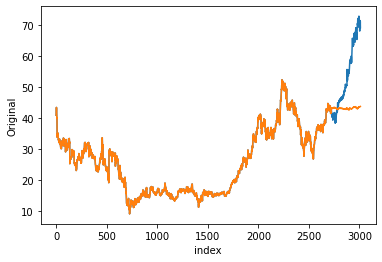

In [63]:
sns.lineplot(data=d, x='index', y='Original')
sns.lineplot(data=d, x='index', y='fitted')